# Description
Hello, I am ihsan,<br>
I continue to improve myself The Data Science and Machine Learning. This notebook is my eighth action on my way to improving myself. Beforehand I have done projects the Data Science and Machine Learning. I will share below the description. In this notebook, I will apply two classification models of Machine Learning. It is The Decision Tree Classifier and Random Forest Classifier models. At the same time, I will use the confusion matrix in the evaluation classification part of machine learning to evaluate our classification models. While I apply The Machine Learning models I will explain them. At the same time, I will review and visualize the dataset. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.<br>

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

Other my notebook:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)

# Contents
- [Data Review](#1)
- [Data Visualization](#2)
- [Classifications Models ](#3)
    - [Data Preparing](#cm1)
    - [Decision Tree Classifier](#cm2)
    - [Random Forest Classifier](#cm3)
    - [Evaluation Classification Models](#cm4)
        - [Confusion Matrix](#cm4-1)


In [98]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 2.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from xgboost import XGBClassifier

from sklearn.linear_model import Ridge

# Data Review <a id = "1"></a>

In [124]:
# I read the dataset with the pandas library.
data = pd.read_csv("G:/mlzoom_camp/2023/drug200.csv")

In [125]:
data
#  data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [126]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [127]:
# Dataset Values(Max, min, std..)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [128]:
# Data Correlation: Relationship between columns
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


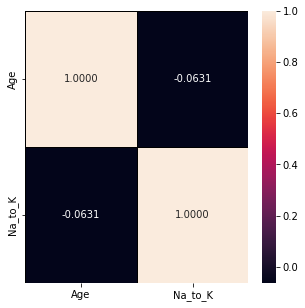

In [129]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

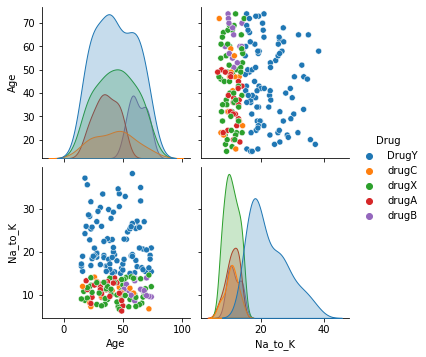

In [130]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(data, hue = "Drug")

In [131]:
# Dataset columns names
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

#### I am checking the data inside the columns.
When I look in dataset. I saw to have string type the data. While I do training, mustn't have string type in the dataset. For this reason, I will review in the column of data because While I am preparing the dataset for training I have to know data inside column of data. 

In [132]:
# Data in the age column
data["Age"].value_counts(dropna=False)

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

****

In [133]:
# Data in the Sex column
data["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

****

In [134]:
# Data in the BP(Blood Pressure Levels) column
data["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

****

In [135]:
# Data in the Cholesterol column
data["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

****

In [136]:
# Data in the Drug column
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

I finished the data review chapter. I reviewed the data and I visualized some data in the data visualization chapter. I will use a different library in the data visualization chapter this time.

# Data Visualization <a id = "2"></a>

#### I applied the plotly library to the dataset.

In [137]:
# I visualized the number of age in the dataset.
dataAge = data["Age"].value_counts(dropna = False)
npar_dataAge = np.array(dataAge)
x = list(npar_dataAge)
y = data.Age.value_counts().index

DataAge = {"Age": y, "Number": x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge, x = "Age", y = "Number")
fig.show()

In [138]:
# I visualized the number of Sex in the dataset. 
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data = [go.Pie(labels= ['M', 'F'], values=[104, 96])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = colors, line = dict( color = '#000000', width = 2)))

fig.show()

In [139]:
# I visualized the number of BP(Blood Pressure Levels) in the dataset. 
fig = px.bar(x = ["HIGH", "LOW", "NORMAL"], y = [77, 64, 59])

fig.show()

In [140]:
# I visualized the number of Cholesterol in the dataset. 
fig = px.histogram(x = ["HIGH", "NORMAL"], y = [103, 97])
fig.show()

In [141]:
# I visualized the number of Drug in the dataset. 
fig = go.Figure(data = [go.Pie(labels=["DrugY","DrugX","DrugA","DrugC","DrugB"], values=[91,54,23,16,16])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))

fig.show()

In [142]:
# I visualized the relationship between age and Na_To_K(Na to Potassium Ration).
fig = px.scatter(data, x = "Na_to_K", y="Age", color="Drug",
                 size='Age', hover_data=['Na_to_K'])
fig.show()

# Classifications Models <a id = "3"></a>
In this chapter, Firstly I will prepare the dataset for training and I will do training with models. I spoke about data inside columns of data during the Data review. Now I will convert string data to the integer type. I will split the dataset as train and test.

## Data Preparing <a id = "cm1"></a>

In [143]:
# I read the dataset with the pandas library again because I will change the dataset.
# I don't want it to stir with the first reading.
data= pd.read_csv("G:/mlzoom_camp/2023/drug200.csv")
data.Drug.value_counts()
# data.shape


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [144]:

data.columns=data.columns.str.lower()


data=data.rename(columns={'sex':'gender'})
data


,age,gender,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Convert all Object Types to Integer Types:



In [145]:
# Change Age type.
# F = 1
# M = 0
data.gender = [1 if i == "F" else 0 for i in data.gender]
# Change BP(Blood Pressure Levels) type.
# LOW = 2 , Normal = 1 , High = 0
data.bp = [2 if i == "LOW" else 1 if i == "NORMAL" else 0 for i in data.bp]
# Change Cholesterol type.
# HIGH = 1 , NORMAL = 0

data.cholesterol = [1 if i == "HIGH" else 0 for i in data.cholesterol]
# Change Drug type.
# DrugY = 4 , DrugX = 3 , DrugA = 2 , DrugC = 1 , DrugB = 0
data.drug= [1 if i == "DrugY" else 1 if i == "drugX" else 0 if i == "drugA" else 0 if i == "drugC" else 0 for i in data.drug]



In [146]:
data.drug.value_counts()

1    145
0     55
Name: drug, dtype: int64

In [147]:
#  any missing value in the dataset 
data.isnull().sum()
#  data types of the columns
data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   gender       200 non-null    int64  
 2   bp           200 non-null    int64  
 3   cholesterol  200 non-null    int64  
 4   na_to_k      200 non-null    float64
 5   drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


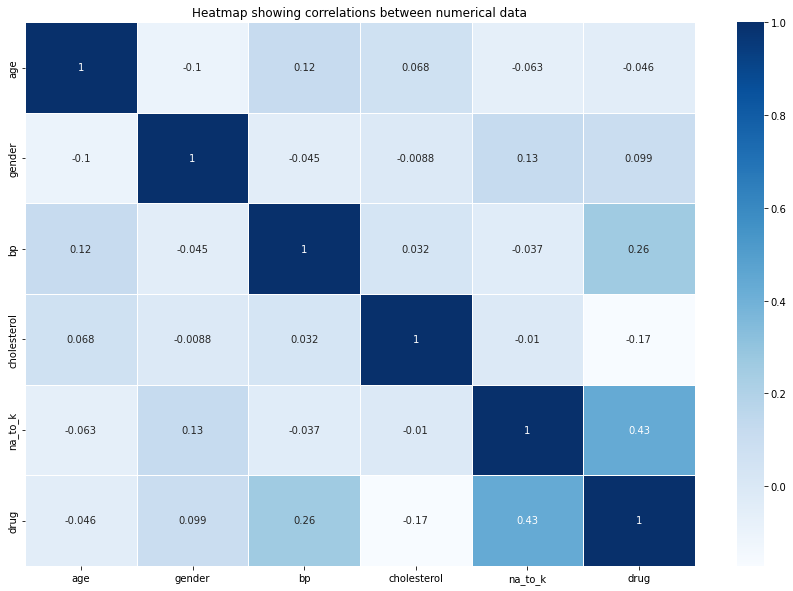

In [148]:
plt.figure(figsize=(15,10))  
sns.heatmap(data.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [149]:
seed = 1


df_intermediate_train, df_test = train_test_split(data, test_size=0.2, random_state=seed)
df_full_train = df_intermediate_train.copy()
df_train, df_val = train_test_split(df_intermediate_train, test_size=0.25, random_state=seed)

y_train = df_train['drug'].values
y_full_train = df_full_train['drug'].values
y_val = df_val['drug'].values
y_test = df_test['drug'].values

del df_train['drug']
del df_full_train['drug']
del df_val['drug']
del df_test['drug']

df_train.info()

print ("##########################")
display( y_full_train )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 63 to 117
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          120 non-null    int64  
 1   gender       120 non-null    int64  
 2   bp           120 non-null    int64  
 3   cholesterol  120 non-null    int64  
 4   na_to_k      120 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 5.6 KB
##########################


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1], dtype=int64)

## Decision Tree Classifier <a id = "cm2"></a>

**What is The Decision Tree Classifier?**<br>
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


### Decision Tree Classifier with "gini"

In [150]:
treshHold=0.5

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logmodel.fit(df_train,y_train)

predictionsProba = logmodel.predict_proba(df_val)[:, 1]
predictions = [ value > treshHold for value in predictionsProba]
predictions = logmodel.predict(df_val)

accuracy = accuracy_score(y_val, predictions)
print( "Logistic Regression Accuracy=", accuracy )

Logistic Regression Accuracy= 0.775


In [112]:
treshHold = 0.5

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logmodel2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logmodel2.fit(df_full_train, y_full_train)

predictions = logmodel.predict(df_test)

display(predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1score = f1_score(y_test, predictions, average='weighted')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")
print("Logistic Full Train Regression Accuracy =", accuracy)

array([3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 1, 4, 4, 0, 3, 3, 3, 0, 4, 3, 3,
       3, 4, 0, 4, 3, 4, 1, 3, 3, 4, 4, 4, 0, 4, 4, 4, 4, 4], dtype=int64)

Precision = 0.719047619047619
Recall = 0.775
F1 Score = 0.7302631578947368
Logistic Full Train Regression Accuracy = 0.775


In [113]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# fit model no training data
xgbModel = XGBClassifier(n_estimators = 500)
treshHold=0.5

xgbModel.set_params( eta=0.01 )
#model.set_params( max_depth=100 )
xgbModel.set_params( objective='binary:logistic' )
#model.set_params( subsample=0.99 )
#model.set_params( lammbda=0.01 )

xgbModel.fit(df_train, y_train)
# make predictions for test data
y_pred = xgbModel.predict(df_val)

display(y_pred)
#predictions = [round(value) for value in y_pred]
predictions = [ value > treshHold for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print( "XG Boost Accuracy=", accuracy )

array([2, 3, 4, 2, 4, 2, 2, 4, 4, 4, 1, 4, 4, 4, 4, 3, 0, 1, 4, 0, 3, 3,
       2, 4, 4, 1, 3, 2, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1], dtype=int64)

XG Boost Accuracy= 0.15


In [111]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# fit model no training data
xgbModel = XGBClassifier(n_estimators = 500)
treshHold=0.5

xgbModel.set_params( eta=0.01 )
#model.set_params( max_depth=100 )
xgbModel.set_params( objective='binary:logistic' )
#model.set_params( subsample=0.99 )
#model.set_params( lammbda=0.01 )

xgbModel.fit(df_train, y_train)
# make predictions for test data
y_pred = xgbModel.predict(df_val)

display(y_pred)
#predictions = [round(value) for value in y_pred]
predictions = [ value > treshHold for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print( "XG Boost Accuracy=", accuracy )

array([2, 3, 4, 2, 4, 2, 2, 4, 4, 4, 1, 4, 4, 4, 4, 3, 0, 1, 4, 0, 3, 3,
       2, 4, 4, 1, 3, 2, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1], dtype=int64)

XG Boost Accuracy= 0.15


In [114]:
from sklearn.metrics import roc_auc_score, roc_curve

In [152]:
for c in df_train.columns:
    print(c)
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%16s, %.3f' % (c, auc))

age
             age, 0.542
gender
          gender, 0.532
bp
              bp, 0.681
cholesterol
     cholesterol, 0.547
na_to_k
         na_to_k, 0.781
